https://docs.google.com/document/d/1dQBTcFjiuRYw9HikHv1OIaTYk-MAMScFtoto9U8B1Gc/edit

Second Semester Project (30 marks)
ShopSmart Inc. is an e-commerce platform that sells a variety of products online. The company aims to optimize its website and enhance customer satisfaction by understanding customer behavior and preferences. To achieve this goal, ShopSmart Inc. plans to analyze the data collected from its website to gain insights into customer interactions, purchasing patterns, and product preferences.
Project Objective: The objective of this project is to utilize data from ShopSmart Inc.'s website to understand customer behavior and preferences. By analyzing the data, the company aims to:
1.     Segment customers based on their preferences, geographic location, and purchasing behavior.
2.     Enhance website usability and user experience based on insights gained from customer interactions.
3.     Optimize product offerings and marketing strategies to improve customer satisfaction and retention.
Data Sources:
The data for this project will be sourced from ShopSmart Inc.'s website and will include various attributes such as customer IDs, device IDs, transaction details, product information, and timestamps of customer interactions.
 
Methodology:
The project will involve data wrangling to preprocess the dataset, followed by exploratory data analysis (EDA) to uncover patterns and trends in customer behavior. Visualization techniques will be used to present the findings effectively.
Expected Outcome:
By understanding customer behavior and preferences, ShopSmart Inc. aims to optimize its website, product offerings, and marketing strategies to increase customer satisfaction, retention, and ultimately, revenue.
 
You are provided with 5 datasets from different tables, your first task is to merge the datasets, clean and wrangle the dataset, engineer new features from event data. Then identify the following:

a.     Visit Frequency:
How often does this customer visit the website, based on the provided data?
Can you identify any patterns or trends in the customer's visit frequency?

b. 	Location Analysis:
What is the customer's location based on the provided data?
How might the customer's location influence their purchasing behavior?

c.  	Overall Purchase Behavior:
Based on the data provided, what insights can you draw about this customer's overall behavior on the website?
How might these insights inform marketing strategies or personalized recommendations for this customer?



In [1]:
#Importing neccessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Accessing and saving the datasets as variables 
customers_df = pd.read_csv(r'C:\Users\KLAUS\Desktop\JUPYTER\altschool-sod-second-semester-project\datasets\customers.csv')
events_df = pd.read_csv(r'C:\Users\KLAUS\Desktop\JUPYTER\altschool-sod-second-semester-project\datasets\events.csv')
orders_df = pd.read_csv(r'C:\Users\KLAUS\Desktop\JUPYTER\altschool-sod-second-semester-project\datasets\orders.csv')
line_items_df = pd.read_csv(r'C:\Users\KLAUS\Desktop\JUPYTER\altschool-sod-second-semester-project\datasets\line_items.csv')
products_df = pd.read_csv(r'C:\Users\KLAUS\Desktop\JUPYTER\altschool-sod-second-semester-project\datasets\products.csv')

In [3]:
# Printing out the columns to access
print("Columns in customers_df:", customers_df.columns)
print("Columns in events_df:", events_df.columns)
print("Columns in orders_df:", orders_df.columns)
print("Columns in line_items_df:", line_items_df.columns)
print("Columns in products_df:", products_df.columns)

Columns in customers_df: Index(['customer_id', 'device_id', 'location', 'currency'], dtype='object')
Columns in events_df: Index(['event_id', 'customer_id', 'event_data', 'event_timestamp'], dtype='object')
Columns in orders_df: Index(['order_id', 'customer_id', 'status', 'checked_out_at'], dtype='object')
Columns in line_items_df: Index(['line_item_id', 'order_id', 'item_id', 'quantity'], dtype='object')
Columns in products_df: Index(['id', 'name', 'price'], dtype='object')


In [4]:
line_items_df.head()

,line_item_id,order_id,item_id,quantity
0,3201,9e950ce3-2e12-479c-a051-493c1a497d49,4,2
1,3202,9e950ce3-2e12-479c-a051-493c1a497d49,5,4
2,3203,9e950ce3-2e12-479c-a051-493c1a497d49,9,5
3,3204,9e950ce3-2e12-479c-a051-493c1a497d49,12,1
4,3205,9e950ce3-2e12-479c-a051-493c1a497d49,6,2


In [5]:
products_df.head()

,id,name,price
0,1,iPhone 13,1099.99
1,2,Samsung Galaxy S21,899.99
2,3,Sony PlayStation 5,499.99
3,4,Microsoft Xbox Series X,499.99
4,5,Nike Air Max 270,129.99


In [6]:
products_df.rename(columns={'id': 'item_id'}, inplace=True)

In [7]:
products_df.head()

,item_id,name,price
0,1,iPhone 13,1099.99
1,2,Samsung Galaxy S21,899.99
2,3,Sony PlayStation 5,499.99
3,4,Microsoft Xbox Series X,499.99
4,5,Nike Air Max 270,129.99


### MERGING THE DATASETS

In [8]:
# Merge customer_df and events_df on 'customer_id'
merged_data1 = pd.merge(customers_df, events_df, on='customer_id', how='inner')

# Merge merged_data1 and orders_df on 'customer_id'
merged_data2 = pd.merge(merged_data1, orders_df, on='customer_id', how='inner')

# Merge merged_data2 and line_items_df on 'order_id'
merged_data3 = pd.merge(merged_data2, line_items_df, on='order_id', how='inner')

# Merge merged_data3 and products_df on 'item_id'
merged_data4 = pd.merge(merged_data3, products_df, on='item_id', how='inner')


### The inner merge was used


#### Inner merge combines the rows from two datasets based on a common key and includes only the rows that have matching values in both datasets. meaning, for each pair of rows (one from each dataset) with the same key value, the resulting merged dataset will contain a single row combining the columns from both datasets.
The rows from either dataset that do not have a corresponding match in the other dataset are excluded from the merged result.
The resulting dataset will contain only rows where the key value exists in both datasets being merged.

This will evidently eliminate any missing value is sign when when isna().sum() function is ran.

Also it would also reduce the total rows of the combined datasets because it doesn't fill with NaN.



#### Outer merge, combines the rows from two datasets using a common key and includes all rows from both datasets, even if there are no matching values in the other dataset.

### The Inner merge is more straight forward and quicker to clean, wranggle and analyze, though a minute amount of negligible data is ignored


In [9]:
merged_data4.shape

(578320, 15)

In [10]:
merged_data4.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",2024-03-27 07:14:33.987347,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",2024-03-30 04:03:10.406559,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14789,"{""timestamp"": ""2024-03-30T04:03:10.406561"", ""e...",2024-03-30 04:03:10.406561,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14790,"{""item_id"": 4, ""quantity"": 2, ""timestamp"": ""20...",2024-03-30 04:03:10.406769,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99


In [11]:
merged_data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578320 entries, 0 to 578319
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      578320 non-null  object 
 1   device_id        578320 non-null  object 
 2   location         578320 non-null  object 
 3   currency         578320 non-null  object 
 4   event_id         578320 non-null  int64  
 5   event_data       578320 non-null  object 
 6   event_timestamp  578320 non-null  object 
 7   order_id         578320 non-null  object 
 8   status           578320 non-null  object 
 9   checked_out_at   578320 non-null  object 
 10  line_item_id     578320 non-null  int64  
 11  item_id          578320 non-null  int64  
 12  quantity         578320 non-null  int64  
 13  name             578320 non-null  object 
 14  price            578320 non-null  float64
dtypes: float64(1), int64(4), object(10)
memory usage: 70.6+ MB


In [12]:
merged_data4.isna().sum()

customer_id        0
device_id          0
location           0
currency           0
event_id           0
event_data         0
event_timestamp    0
order_id           0
status             0
checked_out_at     0
line_item_id       0
item_id            0
quantity           0
name               0
price              0
dtype: int64

In [42]:
# Choosing path to save the dataset to
file_path = r'C:\Users\KLAUS\Desktop\JUPYTER\altschool-sod-second-semester-project\datasets\shopsmart_df.csv'

In [43]:
#Saving the dataset
# merged_data4.to_csv(file_path, index=False)

In [1]:
#Importing neccessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the the datasets using pandas
shopsmart_df = pd.read_csv(r'C:\Users\KLAUS\Desktop\JUPYTER\altschool-sod-second-semester-project\datasets\shopsmart_df.csv')

In [3]:
shopsmart_df.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",2024-03-27 07:14:33.987347,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",2024-03-30 04:03:10.406559,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14789,"{""timestamp"": ""2024-03-30T04:03:10.406561"", ""e...",2024-03-30 04:03:10.406561,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14790,"{""item_id"": 4, ""quantity"": 2, ""timestamp"": ""20...",2024-03-30 04:03:10.406769,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99


In [4]:
shopsmart_df.shape

(578320, 15)

In [5]:
# Investigating for missing or NaN data

In [6]:
shopsmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      578320 non-null  object 
 1   device_id        578320 non-null  object 
 2   location         578320 non-null  object 
 3   currency         578320 non-null  object 
 4   event_id         578320 non-null  int64  
 5   event_data       578320 non-null  object 
 6   event_timestamp  578320 non-null  object 
 7   order_id         578320 non-null  object 
 8   status           578320 non-null  object 
 9   checked_out_at   578320 non-null  object 
 10  line_item_id     578320 non-null  int64  
 11  item_id          578320 non-null  int64  
 12  quantity         578320 non-null  int64  
 13  name             578320 non-null  object 
 14  price            578320 non-null  float64
dtypes: float64(1), int64(4), object(10)
memory usage: 66.2+ MB


In [7]:
shopsmart_df.isna().sum()

customer_id        0
device_id          0
location           0
currency           0
event_id           0
event_data         0
event_timestamp    0
order_id           0
status             0
checked_out_at     0
line_item_id       0
item_id            0
quantity           0
name               0
price              0
dtype: int64

In [8]:
# Checking datasets for duplicates
shopsmart_df.duplicated().sum()

0

In [9]:
# Checking datasets for duplicates
shopsmart_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [10]:
# WIth no missing values,NaN or Duplicate value I can say the data is cleaned

In [11]:
# DATA WRANGLING PROCESS

In [12]:
shopsmart_df.columns

Index(['customer_id', 'device_id', 'location', 'currency', 'event_id',
       'event_data', 'event_timestamp', 'order_id', 'status', 'checked_out_at',
       'line_item_id', 'item_id', 'quantity', 'name', 'price'],
      dtype='object')

In [13]:
# Dropping Unnecessary and Redundant columns
redundant_columns = ['device_id', 'line_item_id', 'event_timestamp']

# Drop irrelevant columns from the merged dataset
shopsmart_clean = shopsmart_df.drop(columns=redundant_columns)

In [14]:
shopsmart_clean.rename(columns={'name': 'product_name'}, inplace=True)

In [15]:
shopsmart_clean.head(3)

,customer_id,location,currency,event_id,event_data,order_id,status,checked_out_at,item_id,quantity,product_name,price
0,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99
1,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99
2,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99


In [16]:

# Extracting first 8 characters of `customer_id` and `order_id` for easy readability
shopsmart_clean['customer_id'] = shopsmart_clean['customer_id'].apply(lambda x: x[:8])
shopsmart_clean['order_id'] = shopsmart_clean['order_id'].apply(lambda x: x[:8])

# Display the updated DataFrame with truncated IDs
shopsmart_clean.head(2)


,customer_id,location,currency,event_id,event_data,order_id,status,checked_out_at,item_id,quantity,product_name,price
0,cda7bec0,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",9e950ce3,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99
1,cda7bec0,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",9e950ce3,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99


### Feature Engineering for the event_data

In [19]:
# Carrying out feature engineering for the event data.

'''

Since the event_data is in json format, 
we have Parse the event_data column in the shopsmart_clean DataFrame to 
extract timestamp and event_type into separate columns using pandas and the json library.

'''

import json


# Parse `event_data` column to extract `timestamp` and `event_type`
shopsmart_clean['timestamp'] = shopsmart_clean['event_data'].apply(lambda x: json.loads(x)['timestamp'])
shopsmart_clean['event_type'] = shopsmart_clean['event_data'].apply(lambda x: json.loads(x)['event_type'])

# Convert `timestamp` to datetime format
shopsmart_clean['timestamp'] = pd.to_datetime(shopsmart_clean['timestamp'])

# Extract date features
shopsmart_clean['day'] = shopsmart_clean['timestamp'].dt.strftime('%A')
shopsmart_clean['month'] = shopsmart_clean['timestamp'].dt.strftime('%B')


# Map timestamp to time of day categories
def get_time_of_day(hour):
    if 0 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply time of day mapping to `timestamp` and create new column `time_of_day`
shopsmart_clean['time_of_day'] = shopsmart_clean['timestamp'].dt.hour.apply(get_time_of_day)


# Displaying the updated DataFrame with new features
shopsmart_clean.head(3)

,customer_id,location,currency,event_id,event_data,order_id,status,checked_out_at,item_id,quantity,product_name,price,timestamp,event_type,day,month,time_of_day
0,cda7bec0,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",9e950ce3,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99,2024-03-26 22:05:58.863661,visit,Tuesday,March,Evening
1,cda7bec0,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",9e950ce3,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99,2024-03-27 07:14:33.987347,visit,Wednesday,March,Morning
2,cda7bec0,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",9e950ce3,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99,2024-03-30 04:03:10.406559,visit,Saturday,March,Morning


In [20]:
# Dropping furthur columns

'''
   Dropping columns that will no longer be neccesarry for my analysis
'''

redundant_columns_2 = ['event_data', 'checked_out_at', 'item_id']

shopsmart = shopsmart_clean.drop(columns=redundant_columns_2)
shopsmart.head(3)

,customer_id,location,currency,event_id,order_id,status,quantity,product_name,price,timestamp,event_type,day,month,time_of_day
0,cda7bec0,Saint Helena,NGN,14786,9e950ce3,success,2,Microsoft Xbox Series X,499.99,2024-03-26 22:05:58.863661,visit,Tuesday,March,Evening
1,cda7bec0,Saint Helena,NGN,14787,9e950ce3,success,2,Microsoft Xbox Series X,499.99,2024-03-27 07:14:33.987347,visit,Wednesday,March,Morning
2,cda7bec0,Saint Helena,NGN,14788,9e950ce3,success,2,Microsoft Xbox Series X,499.99,2024-03-30 04:03:10.406559,visit,Saturday,March,Morning


In [21]:


# Reordering the dataframe to enable easy understanding, the order_id was not added because it is not neccesary to my analysis.

new_column_order = ['customer_id', 'location', 'event_id', 'time_of_day', 'day', 
                    'month', 'product_name', 'price', 'quantity', 'timestamp', 'event_type', 'status']


shopsmart = shopsmart[new_column_order]

# Display the updated DataFrame with reordered columns
shopsmart.head(3)


,customer_id,location,event_id,time_of_day,day,month,product_name,price,quantity,timestamp,event_type,status
0,cda7bec0,Saint Helena,14786,Evening,Tuesday,March,Microsoft Xbox Series X,499.99,2,2024-03-26 22:05:58.863661,visit,success
1,cda7bec0,Saint Helena,14787,Morning,Wednesday,March,Microsoft Xbox Series X,499.99,2,2024-03-27 07:14:33.987347,visit,success
2,cda7bec0,Saint Helena,14788,Morning,Saturday,March,Microsoft Xbox Series X,499.99,2,2024-03-30 04:03:10.406559,visit,success


### Visit Frequency

##### How often does this customer visit the website, based on the provided data?
##### Can you identify any patterns or trends in the customer's visit frequency?


In [39]:
# How often does this customer visit the website, based on the provided data?
'''

  This code defines a function calculate_customer_visit_frequency that filters shopsmart by a specified
  customer ID (customer_id = '3f0fb638') and calculates the number of unique visit timestamps,
  representing how often the customer visited the website. 
  The result is then printed to show the visit frequency for the specified customer.
  
'''


def calculate_customer_visit_frequency(df, customer_id):
 
    # Filtering the shopsmart dataframe for a specific customer_id
    customer_data = df[df['customer_id'] == customer_id]

    # Calculating the number of unique visit timestamps for the customer
    visit_frequency = customer_data['timestamp'].nunique()

    return visit_frequency


customer_id = '3f0fb638'
visit_frequency = calculate_customer_visit_frequency(shopsmart, customer_id)
print(f"Customer with ID '{customer_id}' visited the website {visit_frequency} times.")


Customer with ID '3f0fb638' visited the website 23 times.


#### This code defines a function calculate_customer_visit_frequency that filters shopsmart by a specified 
customer ID (customer_id = 'cda7bec0') and calculates the number of unique visit timestamps, representing how often the customer visited the website. The result is then printed to show the visit frequency for the specified customer.

In [30]:

def calculate_visit_frequency_all_customers(df):
   
    # Calculating frequency of visits for all customers
    visit_frequency_all_customers = df['customer_id'].value_counts().reset_index()
    visit_frequency_all_customers.columns = ['customer_id', 'visit_frequency']

    return visit_frequency_all_customers

# Calling the 'calculate_visit_frequency_all_customers' functiom with the shopsmart dataframe and saving it to a variable.
visit_frequency_all_customers = calculate_visit_frequency_all_customers(shopsmart)

# Display the DataFrame showing visit frequency for all customers
print("Visit Frequency for All Customers:")
visit_frequency_all_customers

Visit Frequency for All Customers:


,customer_id,visit_frequency
0,eb7dcb88,372
1,a7d9058a,360
2,12e94262,360
3,ebcea232,360
4,c391f179,360
...,...,...
4589,dc9500b1,3
4590,48139381,3
4591,4e412d78,3
4592,81d65a2c,3


####  This code defines the function 'calculate_visit_frequency_all_customers' that calculates the visit frequency for all customers in the shopsmart (df). It counts the occurrences of each customer ID ('customer_id') in the DataFrame to determine how often each customer visited the website. The resulting DataFrame (visit_frequency_all_customers) contains customer IDs and the respective visit frequencies, which is then printed to display the overall visit frequency for all customers.

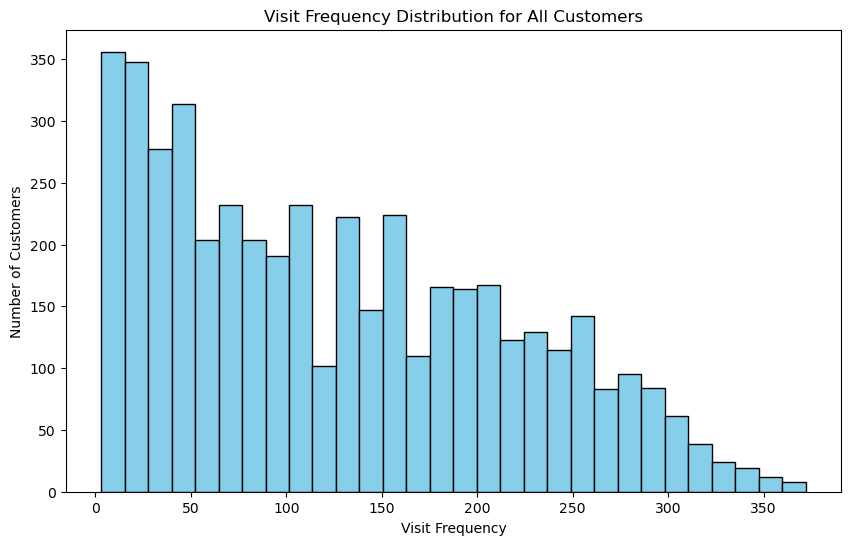

In [24]:
# Visualizing the visit frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(visit_frequency_all_customers['visit_frequency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Visit Frequency Distribution for All Customers')
plt.xlabel('Visit Frequency')
plt.ylabel('Number of Customers')
plt.show()

In [25]:
visit_frequency_all_customers.describe()

,visit_frequency
count,4594.000000
mean,125.885938
std,89.186046
min,3.000000
25%,45.000000
50%,112.000000
75%,198.000000
max,372.000000



####  From the .describe(), it can be seen that the total number of unique customer_d is 4594

#### The Average visit per customer_id is 125

#### The highest visit per individual is 372 and the minimum visit is 3

### Can you identify any patterns or trends in the customer's visit frequency?

#### Trend Analysis by Time of Day

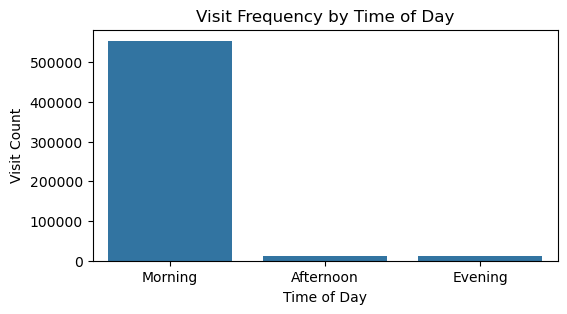

In [26]:

# Plot visit frequency by time of day
plt.figure(figsize=(6, 3))
sns.countplot(x='time_of_day', data=shopsmart, order=['Morning', 'Afternoon', 'Evening'])
plt.title('Visit Frequency by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Visit Count')
plt.show()

#### From the seaborn count plot we could see that most customer visits the shopsmart website in the morning.

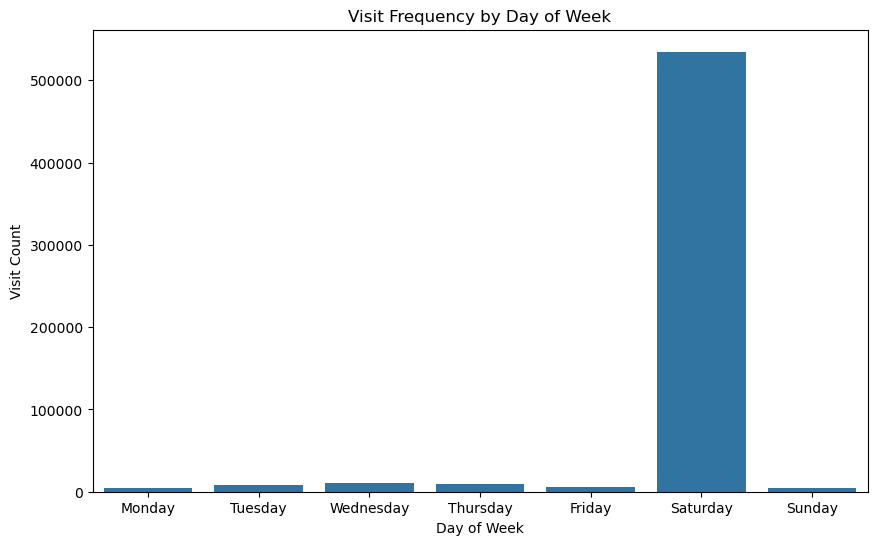

In [27]:
# Plot visit frequency by day of week
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=shopsmart, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Visit Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Visit Count')
plt.show()


### From the seaborn count plot we could see that most customer visits the shopsmart website mainly on Saturdays.

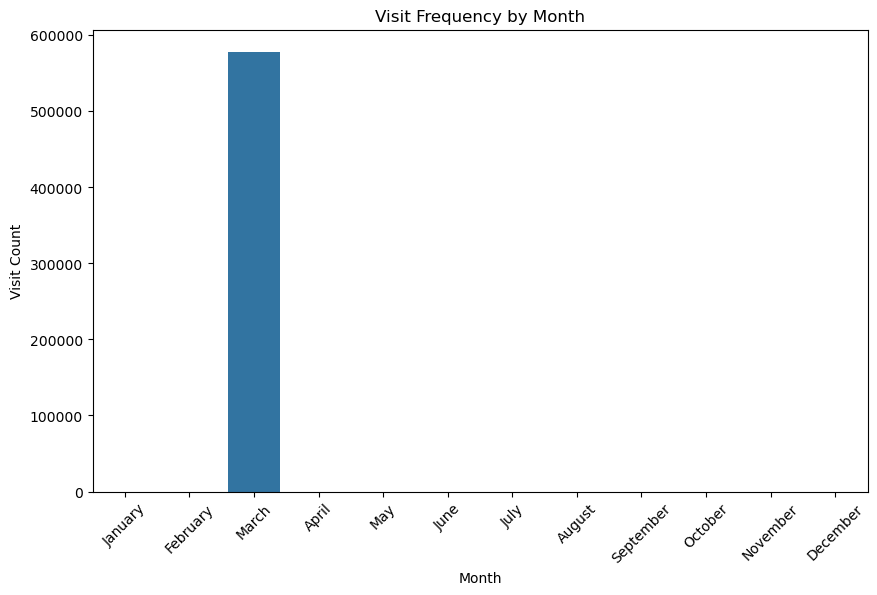

In [102]:
# Plot visit frequency by month
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=shopsmart, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Visit Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Visit Count')
plt.xticks(rotation=45)
plt.show()

### From the seaborn count plot we could see that most customer visits the shopsmart website in the month of March, this could mean that the company started collecting data from the month of march

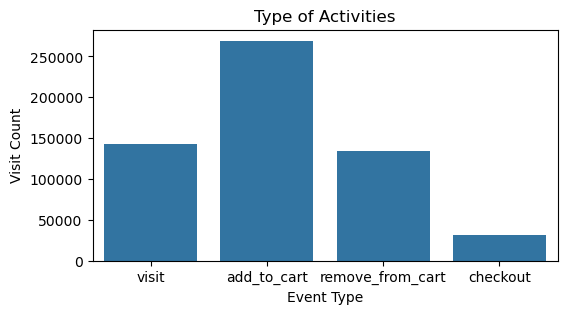

In [133]:

# Plot visit frequency by time of day
plt.figure(figsize=(6, 3))
sns.countplot(x='event_type', data=shopsmart, order=['visit', 'add_to_cart', 'remove_from_cart', 'checkout'])
plt.title('Type of Activities')
plt.xlabel('Event Type')
plt.ylabel('Visit Count')
plt.show()

#### From the count plot, it can be seen that they are more visits with add_to_cart, also my customers remove_from_cart than checkout

### Location Analysis

##### What is the customer's location based on the provided data?

##### How might the customer's location influence their purchasing behavior?

In [47]:

def get_customer_location(df, customer_id):
   
    # Filtering the DataFrame for the specified customer_id
    customer_data = df[df['customer_id'] == customer_id]

    # Checking to see if any data exists for the customer_id
    if not customer_data.empty:
        # Geting the unique location associated with the customer_id (I assumed same location for all records)
        location = customer_data['location'].iloc[0]
        return location
    else:
        return None  # This will Return None if customer_id is not found in the DataFrame


customer_id = '3f0fb638'
customer_location = get_customer_location(shopsmart, customer_id)

if customer_location is not None:
    print(f"Location for Customer with ID '{customer_id}': {customer_location}")
else:
    print(f"Customer with ID '{customer_id}' not found in the dataset.")


Location for Customer with ID '3f0fb638': Guernsey


This code defines a function get_customer_location that takes a DataFrame (df) and a customer ID (customer_id) as input. It filters the DataFrame to retrieve data associated with the specified customer ID. If data exists for the customer ID (i.e., the DataFrame is not empty), it retrieves the unique location associated with that customer ID from the DataFrame. If the customer ID is not found in the DataFrame, the function returns None.

The customer_id variable is then used to call the get_customer_location function with the shopsmart DataFrame. If a valid location is returned (customer_location is not None), it prints the location for the specified customer ID. If the customer ID is not found (customer_location is None), it prints a message indicating that the customer was not found in the dataset.

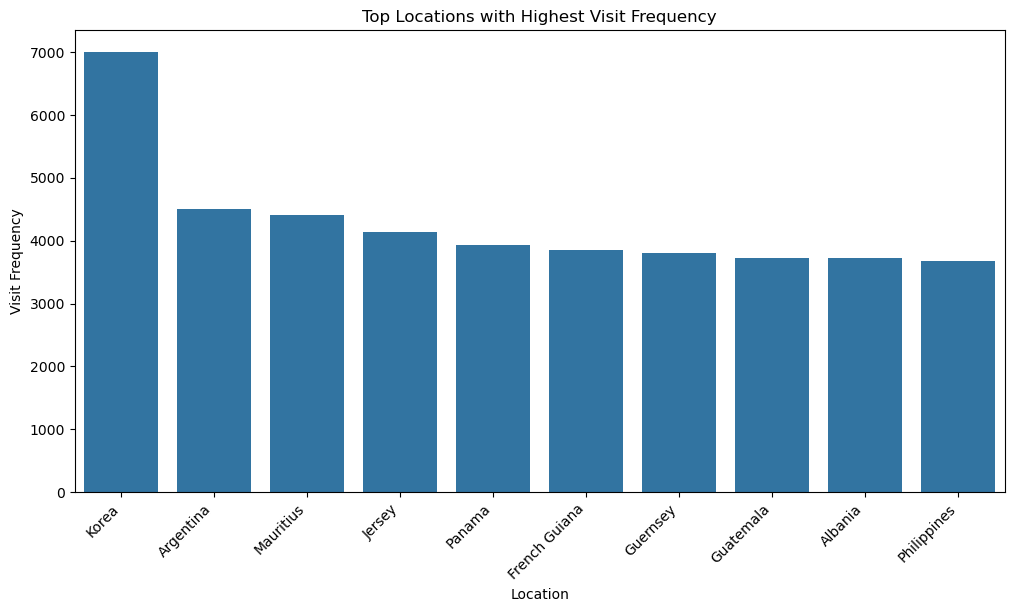

In [34]:


# Calculating visit frequency for each location
visit_frequency_by_location = shopsmart['location'].value_counts().reset_index()
visit_frequency_by_location.columns = ['location', 'visit_frequency']

# Sort locations by visit frequency in descending order
top_locations = visit_frequency_by_location.sort_values(by='visit_frequency', ascending=False)

# Display or visualize the top locations with the highest visit frequency


# Visualize the top locations with the highest visit frequency using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='visit_frequency', data=top_locations.head(10))
plt.title('Top Locations with Highest Visit Frequency')
plt.xlabel('Location')
plt.ylabel('Visit Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


From the Seaborn plot, the two locations with the highest Visits is Korea and Argentina

In [36]:
top_locations.head(10)

,location,visit_frequency
0,Korea,6997
1,Argentina,4507
2,Mauritius,4414
3,Jersey,4130
4,Panama,3936
5,French Guiana,3851
6,Guernsey,3804
7,Guatemala,3731
8,Albania,3721
9,Philippines,3675


C:\Users\KLAUS\AppData\Local\Temp\ipykernel_21432\2569509421.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='success_checkout_count', data=top_locations_with_most_successful_checkouts, palette='viridis')


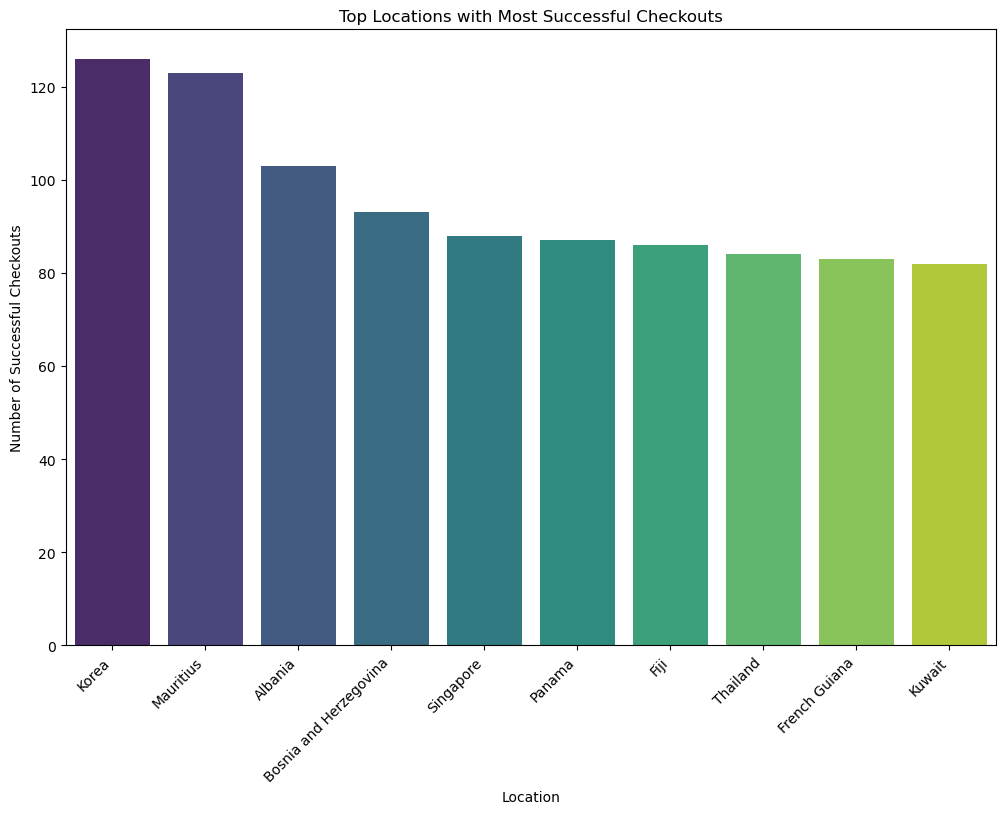

In [150]:

# Filter the DataFrame to include only successful checkouts
success_checkouts = shopsmart[(shopsmart['status'] == 'success') & (shopsmart['event_type'] == 'checkout')]

# Count the number of successful checkouts by location
success_checkout_counts = success_checkouts['location'].value_counts().reset_index()
success_checkout_counts.columns = ['location', 'success_checkout_count']

# Sort the locations by the number of successful checkouts (descending order)
top_locations_with_most_successful_checkouts = success_checkout_counts.sort_values(by='success_checkout_count', ascending=False).head(10)

# Visualize the top locations with the most successful checkouts
plt.figure(figsize=(12, 8))
sns.barplot(x='location', y='success_checkout_count', data=top_locations_with_most_successful_checkouts, palette='viridis')
plt.title('Top Locations with Most Successful Checkouts')
plt.xlabel('Location')
plt.ylabel('Number of Successful Checkouts')
plt.xticks(rotation=45, ha='right')
plt.show()


From the Seaborn barplot, the two locations with the highest successful checkouts is Korea and Mauritus

In [151]:
top_locations_with_most_successful_checkouts

,location,success_checkout_count
0,Korea,126
1,Mauritius,123
2,Albania,103
3,Bosnia and Herzegovina,93
4,Singapore,88
5,Panama,87
6,Fiji,86
7,Thailand,84
8,French Guiana,83
9,Kuwait,82


C:\Users\KLAUS\AppData\Local\Temp\ipykernel_21432\4075659938.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='failed_checkout_counts', data=top_failed_checkout_locations, palette='viridis')


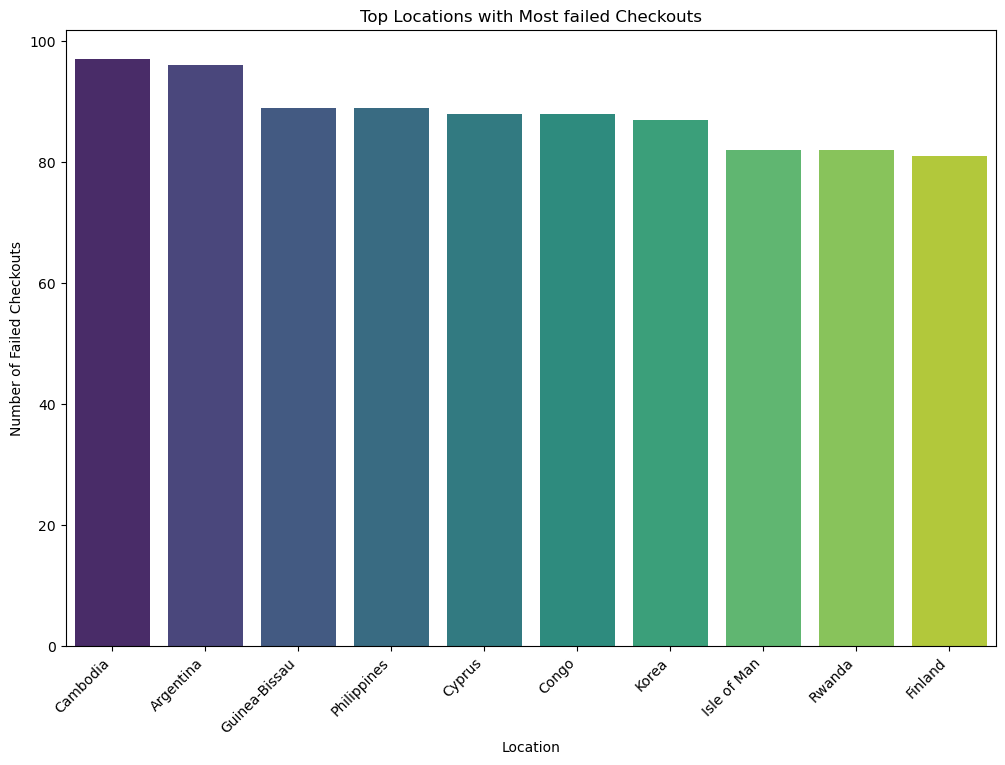

In [146]:

# Filter the DataFrame to include only successful checkouts
failed_checkouts = shopsmart[(shopsmart['status'] == 'failed') & (shopsmart['event_type'] == 'checkout')]

# Count the number of successful checkouts by location
failed_checkout_counts = failed_checkouts['location'].value_counts().reset_index()
failed_checkout_counts.columns = ['location', 'failed_checkout_counts']

# Sort the locations by the number of successful checkouts (descending order)
top_failed_checkout_locations = failed_checkout_counts.sort_values(by='failed_checkout_counts', ascending=False).head(10)

# Visualize the top locations with the most successful checkouts
plt.figure(figsize=(12, 8))
sns.barplot(x='location', y='failed_checkout_counts', data=top_failed_checkout_locations, palette='viridis')
plt.title('Top Locations with Most failed Checkouts')
plt.xlabel('Location')
plt.ylabel('Number of Failed Checkouts')
plt.xticks(rotation=45, ha='right')
plt.show()


From the Seaborn barplot, the two locations with the highest failed checkouts is Cambodia and Argentina

In [147]:
top_failed_checkout_locations

,location,failed_checkout_counts
0,Cambodia,97
1,Argentina,96
2,Guinea-Bissau,89
3,Philippines,89
4,Cyprus,88
5,Congo,88
6,Korea,87
7,Isle of Man,82
8,Rwanda,82
9,Finland,81


C:\Users\KLAUS\AppData\Local\Temp\ipykernel_21432\2035009950.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='cancelled_order_counts', data=top_locations_with_cancelled_order, palette='viridis')


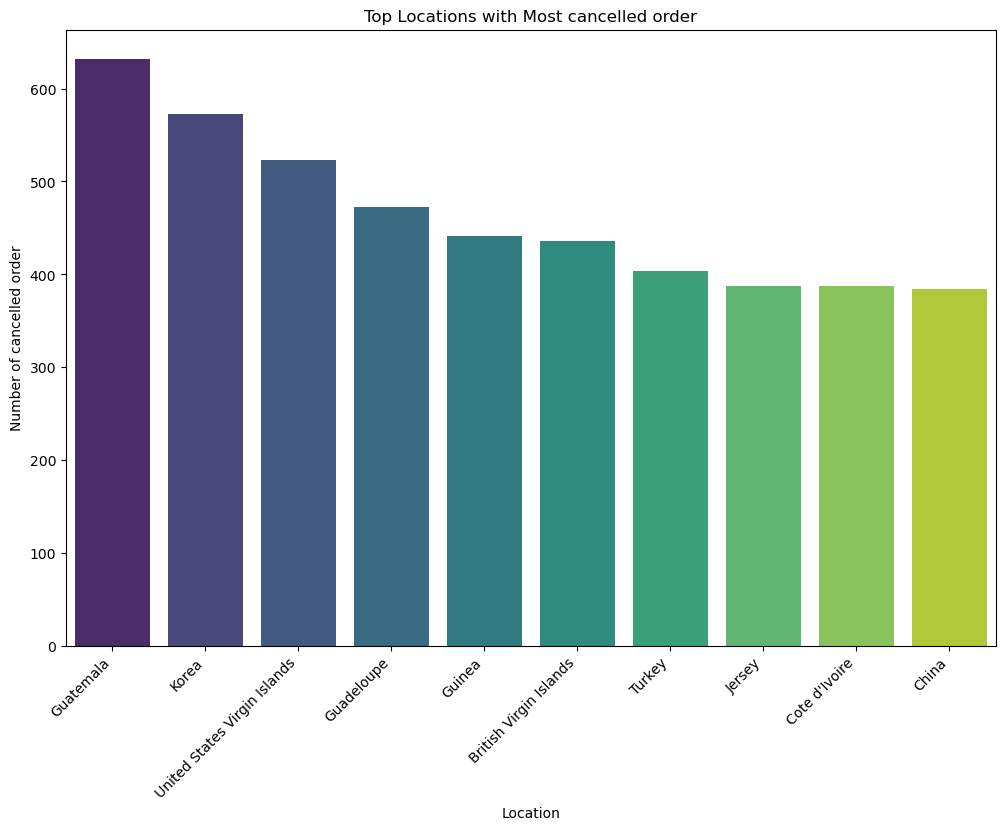

In [153]:

# Filter the DataFrame to include only successful checkouts
cancelled_order = shopsmart[(shopsmart['status'] == 'cancelled') & (shopsmart['event_type'] == 'remove_from_cart')]

# Count the number of successful checkouts by location
cancelled_order_counts = cancelled_order['location'].value_counts().reset_index()
cancelled_order_counts.columns = ['location', 'cancelled_order_counts']

# Sort the locations by the number of successful checkouts (descending order)
top_locations_with_cancelled_order = cancelled_order_counts.sort_values(by='cancelled_order_counts', ascending=False).head(10)

# Visualize the top locations with the most successful checkouts
plt.figure(figsize=(12, 8))
sns.barplot(x='location', y='cancelled_order_counts', data=top_locations_with_cancelled_order, palette='viridis')
plt.title('Top Locations with Most cancelled order')
plt.xlabel('Location')
plt.ylabel('Number of cancelled order')
plt.xticks(rotation=45, ha='right')
plt.show()


From the Seaborn plot, the two locations with the highest cancelled and remove_from_cart is Guatemala and Korea

In [154]:
top_locations_with_cancelled_order

,location,cancelled_order_counts
0,Guatemala,632
1,Korea,573
2,United States Virgin Islands,523
3,Guadeloupe,472
4,Guinea,441
5,British Virgin Islands,436
6,Turkey,403
7,Jersey,387
8,Cote d'Ivoire,387
9,China,384


In [44]:


# Filter the DataFrame to include only successful checkouts
success_checkouts = shopsmart[(shopsmart['status'] == 'success') & (shopsmart['event_type'] == 'checkout')]

# Count the number of successful checkouts for each customer and location
success_checkout_counts = success_checkouts.groupby(['customer_id', 'location']).size().reset_index(name='success_checkout_count')

# Find the customer with the most successful checkouts
top_customer_with_most_successful_checkouts = success_checkout_counts.sort_values(by='success_checkout_count', ascending=False).iloc[0]

# Retrieve the customer ID, location, and number of successful checkouts for the top customer
top_customer_id = top_customer_with_most_successful_checkouts['customer_id']
top_customer_location = top_customer_with_most_successful_checkouts['location']
top_customer_successful_checkouts = top_customer_with_most_successful_checkouts['success_checkout_count']

# Calculate additional metrics for the top customer
top_customer_data = shopsmart[shopsmart['customer_id'] == top_customer_id]
total_visits = top_customer_data['timestamp'].nunique()
items_bought = top_customer_data['product_name'].unique()
total_spending = top_customer_data['price'].sum()

# Display the information for the top customer
print(f"Top Customer ID: '{top_customer_id}'")
print(f"Location: '{top_customer_location}'")
print(f"Number of Successful Checkouts: {top_customer_successful_checkouts}")
print(f"Total Visits: {total_visits}")
print(f"Items Bought: {items_bought}")
print(f"Total Spending: ${total_spending:.2f}")


Top Customer ID: '3f0fb638'
Location: 'Guernsey'
Number of Successful Checkouts: 12
Total Visits: 23
Items Bought: ['Microsoft Xbox Series X' 'Nike Air Max 270' 'Nintendo Switch'
 'Coca-Cola 12-Pack' 'Adidas Ultraboost' 'Canon EOS R5 Camera'
 'Starbucks Coffee Beans' 'Dell XPS 13 Laptop' 'Samsung Galaxy S21'
 'Samsung 55-Inch 4K Smart TV' 'Apple AirPods Pro' 'Sony PlayStation 5']
Total Spending: $204214.47


In [45]:


# Filter the DataFrame to include only successful checkouts
success_checkouts = shopsmart[(shopsmart['status'] == 'success') & (shopsmart['event_type'] == 'checkout')]

# Count the number of successful checkouts for each customer and location
success_checkout_counts = success_checkouts.groupby(['customer_id', 'location']).size().reset_index(name='success_checkout_count')

# Find the customer with the least successful checkouts (or purchases)
bottom_customer_with_least_successful_checkouts = success_checkout_counts.sort_values(by='success_checkout_count', ascending=True).iloc[0]

# Retrieve the customer ID, location, and number of successful checkouts for the bottom customer
bottom_customer_id = bottom_customer_with_least_successful_checkouts['customer_id']
bottom_customer_location = bottom_customer_with_least_successful_checkouts['location']
bottom_customer_successful_checkouts = bottom_customer_with_least_successful_checkouts['success_checkout_count']

# Calculate additional metrics for the bottom customer
bottom_customer_data = shopsmart[shopsmart['customer_id'] == bottom_customer_id]
total_visits_bottom = bottom_customer_data['timestamp'].nunique()
items_bought_bottom = bottom_customer_data['product_name'].unique()
total_spending_bottom = bottom_customer_data['price'].sum()

# Display the information for the bottom customer
print(f"Bottom Customer ID: '{bottom_customer_id}'")
print(f"Location: '{bottom_customer_location}'")
print(f"Number of Successful Checkouts: {bottom_customer_successful_checkouts}")
print(f"Total Visits: {total_visits_bottom}")
print(f"Items Bought: {items_bought_bottom}")
print(f"Total Spending: ${total_spending_bottom:.2f}")


Bottom Customer ID: 'e7294e16'
Location: 'Western Sahara'
Number of Successful Checkouts: 1
Total Visits: 11
Items Bought: ['Samsung 55-Inch 4K Smart TV']
Total Spending: $8799.89


### Overall Purchase Behavior

##### Based on the data provided, what insights can you draw about this customer's overall behavior on the website?
##### How might these insights inform marketing strategies or personalized recommendations for this customer?


### Overall Purchase Behavior:

### Visit Frequency:
The customer visited the website 23 times, which is relatively high compared to the average visit per customer (125 visits on average).
There is a wide range of visit frequencies among customers, from 3 to 372 visits per individual, indicating varied engagement levels.

#### Time of Engagement:
Most customers visit the website in the morning and mainly on Saturdays, suggesting peak times for website traffic.
The majority of customer visits occurred in March, possibly indicating when data collection began or a peak period for website activity.
Event Type Distribution:
The count plot shows more engagements with 'add_to_cart' and 'remove_from_cart' actions compared to checkouts, suggesting potential opportunities to optimize the checkout process.
Location Analysis:
The customer's location ('Guernsey') and insights into other locations with high engagement, successful checkouts, and specific actions (like cancellations) provide valuable geographic targeting insights.
#### Insights into Customer Behavior:
Behavioral Patterns:
The customer exhibits high engagement with frequent visits and a significant number of successful checkouts (12), indicating strong purchase intent.
Diverse purchases across categories (electronics, footwear, consumables) suggest broad interests and potential for cross-selling or personalized recommendations.
Location Influence:
Locations like Korea and Argentina stand out with high engagement and varying success rates (successful checkouts, cancellations), indicating potential regional preferences and behaviors.
#### Recommendations for Marketing and Personalization:
Marketing Strategies:
Implement personalized promotions and recommendations based on observed behavioral patterns (e.g., morning visits, Saturday activity).
Leverage location-specific insights to tailor marketing campaigns and product offerings to match regional preferences and behaviors.
#### Website Optimization:
Optimize checkout processes to reduce friction and increase conversion rates, considering the high engagement with 'add_to_cart' but relatively fewer checkouts.
Enhance user experience during peak visit times (morning, Saturdays) to maximize conversion opportunities.
Product Offering:
Expand and optimize product offerings based on popular categories and observed purchasing behaviors (electronics, footwear) to cater to customer preferences.
Feature trending or exclusive items to drive interest and engagement.
Customer Retention and Engagement:
Implement loyalty programs or incentives to reward frequent visitors and high-value customers.
Encourage customer feedback and reviews to improve services and address any pain points identified in the checkout process.
